#### These series of codes goes into the file to batch the temperature data for each temperature in steps of 20

In [1]:
import pandas as pd
import numpy as np


def process_data(filename, time_step, init_time_value, fin_time_value, init_temp_value, fin_temp_value, temp_step, column_names):
    
    data = {}  # This is a dictionary to contain data for each temperature


    number_of_rows = int(((fin_time_value - init_time_value)/time_step) + 1) 


    number_of_temperatures = int(((fin_temp_value - init_temp_value)/temp_step) + 1)


    
    for k in range(init_temp_value, fin_temp_value + temp_step, temp_step):

        # this code says, for example, if this is tempertare number 2, skip 2 X number_of_rows and the read only number_of_rows
        index_of_temperature = int(((k - init_temp_value)/temp_step) + 1)
        header_rows_to_skip = (index_of_temperature - 1) * (number_of_rows)

        data["{}".format(k)] = pd.read_csv("{}.txt".format(filename), header=None,
                                           delimiter="\t", 
                                           names=column_names, index_col=False,
                                           skiprows=header_rows_to_skip,  nrows=number_of_rows)
    return data
        
    

In [2]:
column_names = ["Time Step", "LM X", "Error X", "LM Y", "Error Y", "LM Z",
                "Error Z", "Polarization", "Electric Field"]

init_temp_value = 300
fin_temp_value = 510
temp_step = 10

init_time_value = 200
fin_time_value = 300000
time_step = 200

filename = "all_temp_0"

data = process_data(filename, time_step, init_time_value, fin_time_value, init_temp_value, fin_temp_value, temp_step, column_names)

In [3]:
data["300"]

,Time Step,LM X,Error X,LM Y,Error Y,LM Z,Error Z,Polarization,Electric Field
0,200,-0.000493,0.000037,-0.000060,0.000020,-0.029285,0.000401,-38.304989,1.256604e+01
1,400,-0.000556,0.000030,-0.000349,0.000231,-0.028711,0.000309,-37.553360,2.513010e+01
2,600,-0.000480,0.000014,-0.000979,0.000068,-0.028898,0.000384,-37.798911,3.769018e+01
3,800,-0.000289,0.000227,-0.000524,0.000289,-0.028552,0.000267,-37.346212,5.024432e+01
4,1000,0.000937,0.000416,0.000370,0.000249,-0.028166,0.000297,-36.841050,6.279052e+01
...,...,...,...,...,...,...,...,...,...
1495,299200,-0.000117,0.000182,-0.000330,0.000030,-0.030082,0.000077,-39.346968,-5.024432e+01
1496,299400,0.000385,0.000077,-0.000073,0.000120,-0.029822,0.000049,-39.007098,-3.769018e+01
1497,299600,0.000701,0.000092,0.000423,0.000202,-0.029772,0.000104,-38.941593,-2.513010e+01
1498,299800,0.000393,0.000243,0.001104,0.000152,-0.029628,0.000043,-38.752953,-1.256604e+01


#### Visualize the data for temperature 400k 

### Get averages 

In [4]:
def get_mean(data, init_temp_value, fin_temp_value, temp_step, filename):
    
    average = {}

    columns = data[f"{init_temp_value}"].columns
    

    for k in range(init_temp_value, fin_temp_value + temp_step, temp_step):
        
        temp_df = pd.DataFrame()
        
        period_1 = data[f"{k}"].loc[0:499]
        period_2 = data[f"{k}"].loc[500:999]
        period_3 = data[f"{k}"].loc[1000:1499]
        
        for column in columns:
            temp_df[column] = np.mean((period_1[column].to_numpy(),
                                        period_2[column].to_numpy()
                                        ,period_3[column].to_numpy()), axis=0)


        average[k] = temp_df

    averages = pd.concat([average[k] for k in range(init_temp_value, 
                                                    fin_temp_value + temp_step, temp_step)]) 

    averages.to_csv(filename, header=False, index=False, sep="\t")
    
    
    
    return averages, average


averages, average = get_mean(data, init_temp_value, fin_temp_value,
                    temp_step, "AveragesShowmoney.txt")

column_names = ["Time Step", "LM X", "Error X", "LM Y", "Error Y", "LM Z",
                "Error Z", "Polarization", "Electric Field"]

init_temp_value = 300
fin_temp_value = 510
temp_step = 10

init_time_value = 200
fin_time_value = 100000
time_step = 1000

filename = "AveragesShowmoney"

averages = process_data(filename, time_step, init_time_value, fin_time_value, init_temp_value, fin_temp_value, temp_step, column_names) 

In [5]:
data["480"]

,Time Step,LM X,Error X,LM Y,Error Y,LM Z,Error Z,Polarization,Electric Field
0,200,-0.000217,0.000214,0.000119,0.000092,-0.003353,0.000650,-4.386339,1.256604e+01
1,400,-0.000214,0.000196,0.000507,0.000070,-0.000131,0.001209,-0.171753,2.513010e+01
2,600,0.000485,0.000126,0.000069,0.000287,0.003772,0.000866,4.933462,3.769018e+01
3,800,-0.000741,0.000481,0.000226,0.000286,0.006354,0.000653,8.311307,5.024432e+01
4,1000,-0.000923,0.000351,-0.000173,0.000420,0.007295,0.000076,9.541441,6.279052e+01
...,...,...,...,...,...,...,...,...,...
1495,299200,0.000606,0.000409,0.000563,0.000378,-0.014178,0.000725,-18.544471,-5.024432e+01
1496,299400,-0.000503,0.000145,0.001185,0.000162,-0.012916,0.000066,-16.894494,-3.769018e+01
1497,299600,-0.000068,0.000128,0.000535,0.000106,-0.011923,0.000518,-15.595336,-2.513010e+01
1498,299800,0.000128,0.000085,0.000680,0.000112,-0.009970,0.000566,-13.040224,-1.256604e+01


### Use averages as data

In [6]:
#data = averages

#### Save Data For Each Temperature To CSV

In [7]:
for k in range(300, 520, 10):      
    data["{}".format(k)].to_csv("LocalModeData_For_{}k.csv".format(k), header=False, index=False)

In [8]:
import matplotlib.pyplot as plt

def plot_data(quantities, data, save_file_name, temperature, plot_title, figure_size):
    
    fig, ax = plt.subplots(nrows=1, ncols=len(quantities), figsize=figure_size)
    
    font = {'family': 'serif','color': 'darkred','weight': 'normal','size': 16}
    
    if len(quantities) > 1:
        
        for i in range(len(quantities)):

            for value in quantities[i]["Y Values"]:

                ax[i].plot(data["{}".format(temperature)][quantities[i]["X Values"]], data["{}".format(temperature)][value],
                        linewidth=2, markersize=10, label=value)
                ax[i].spines["right"].set_visible(False)
                ax[i].spines["top"].set_visible(False)
                ax[i].xaxis.set_tick_params(which='major', size=10, width=2, direction='out', bottom=True)
                ax[i].yaxis.set_tick_params(which='major', size=10, width=2, direction='out', left=True)
                ax[i].legend(loc=quantities[i]["Legend Location"], frameon=True, fontsize=16)
                ax[i].set_ylabel(quantities[i]["Y label"], fontdict=font, labelpad=5)
                ax[i].set_xlabel(quantities[i]["X label"], fontdict=font, labelpad=10)   
 
        
        font["Size"] = 20
        plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)
        plt.savefig("{}_{}k.png".format(save_file_name, temperature), dpi=300,
                                transparent=False, bbox_inches='tight')
        plt.pause(5)
        plt.show(block=False)    
        
    else:

        for value in quantities[0]["Y Values"]:

            ax.plot(data["{}".format(temperature)][quantities[0]["X Values"]], data["{}".format(temperature)][value],
                    linewidth=2, markersize=10, label=value)
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', bottom=True)
        ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='out', left=True)
        ax.legend(loc="upper left", frameon=True, fontsize=16)
        ax.set_title('{} {}k'.format(plot_title, temperature), fontdict=font, pad=10)
        ax.set_ylabel(quantities[0]["X label"], fontdict=font, labelpad=10)
        ax.set_xlabel(quantities[0]["Y label"], labelpad=10)
        plt.savefig("{}_{}k.png".format(save_file_name, temperature), dpi=300,
                                transparent=False, bbox_inches='tight')
        plt.pause(5)
        plt.show(block=False)

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

def plot_hysteresis(quantities, data, save_file_name, init_temp_value, fin_temp_value,
              temp_step, figure_size, plot_title):
    
    fig, ax = plt.subplots(nrows=1, ncols=len(quantities), figsize=figure_size)
    
    #c = np.arange(1, int(((fin_temp_value - init_temp_value)/temp_step) + 1) + 1)
    c=np.arange(310,520,10)
    #c = np.array([str(item) + "k" for item in c])
    print(type(c))
    norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
    cmap.set_array([])
#     c = list(c)
#     c = [item for item in c]
#     c = np.array(c)
#     print(type(c))
    
    font = {'family': 'serif','color': 'darkred','weight': 'normal','size': 16}
    
        
    for value in quantities[0]["Y Values"]:
        for temp in range(init_temp_value, fin_temp_value+temp_step, temp_step):
            index_of_temperature = int(((k - init_temp_value)/temp_step) + 1)
            p = ax.plot(data["{}".format(temp)][quantities[0]["X Values"]],
                    data["{}".format(temp)][value],
                    linewidth=2, markersize=10, c=cmap.to_rgba(temp))
            
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', bottom=True)
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='out', left=True)
    ax.legend([value], loc="upper left", frameon=True, fontsize=16)
    ax.set_ylabel(quantities[0]["Y label"], fontdict=font, labelpad=10)
    ax.set_xlabel(quantities[0]["X label"], labelpad=10)
    ax.set_xlim(-1000, 1000) 
    #ax.grid(b=True, which='major', axis='both')
    ax.axhline(y=0, alpha=0.2)
    ax.axvline(x=0, alpha=0.2)
    plt.savefig("{}.png".format(save_file_name), dpi=300,
                                transparent=False, bbox_inches='tight')
    fig.colorbar(cmap, ticks=c)
    plt.pause(5)
    plt.show(block=False)    
        

<class 'numpy.ndarray'>


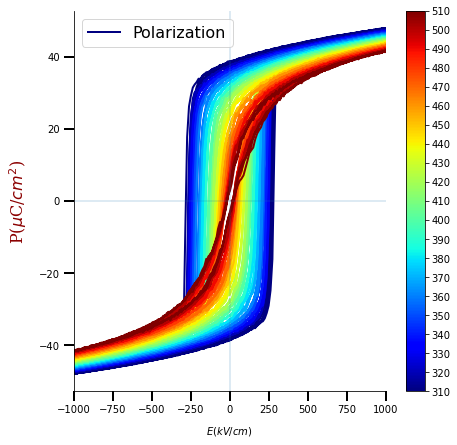

In [10]:
quantities_1 = {"X Values": "Electric Field", 
                  "Y Values" : ["Polarization"], 
               "X label": "$E(kV/cm)$",
               "Y label": "P($\mu$C/$cm^2$)"}
               #"Legend Location": "upper left"#}

quantities = [quantities_1]


# filename you want to save figure as. Example should be something like Local_Modes_vs_Electric_Field_
save_file_name = "alltemp_5" 

# Specify the title of your plot here for example "Local Modes against Electric Field for temperature"

plot_title = "Polarization Modes against Electric Field for" 

figure_size = (7, 7)

plot_hysteresis(quantities, data, save_file_name, init_temp_value, fin_temp_value,
              temp_step, figure_size, plot_title)

In [11]:
def get_peaks(data, electric_fields, init_temp_value, ef_step, cb_step,
              fin_temp_value, temp_step, save_file_name):
    
    peaks_for_temp = pd.DataFrame(index=np.arange(init_temp_value,
                                fin_temp_value+temp_step, temp_step), columns=electric_fields)
    
    c=np.arange(int(electric_fields[0]),int(electric_fields[-1]), ef_step)
    norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
    cmap.set_array([])
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
    font = {'family': 'serif','color': 'darkred','weight': 'normal','size': 16}
    
    for field in electric_fields:
        for key, value in data.items():
            #if int(field) >= 0 or int(field) <=0:
            cond = np.where(np.diff(data[key]["Electric Field"]) < 0)
            peaks_for_temp[field][int(key)] = np.interp(int(field),
                                                data[key]["Electric Field"][cond[0]][::-1],
                                                data[key]["Polarization"][cond[0]][::-1])
#             else:
#                 cond = np.where(np.diff(data[key]["Electric Field"]) > 0)
#                 peaks_for_temp[field][int(key)] = np.interp(int(field),
#                                                 data[key]["Electric Field"][cond[0]], 
#                                                 data[key]["Polarization"][cond[0]])
    

        ax.plot(np.arange(init_temp_value, fin_temp_value+temp_step, temp_step),
                peaks_for_temp[field], "-.",
                linewidth=2, markersize=10, label="{} Kv/cm".format(field))
            
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', bottom=True)
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='out', left=True)
    #ax.legend(loc="upper left", frameon=True, fontsize=16, bbox_to_anchor=(1, 1))
    ax.set_ylabel("P($\mu$C/$cm^2$)", fontdict=font, labelpad=10)
    ax.set_xlabel("T (K)", fontdict=font, labelpad=10)
    
    
    plt.colorbar(cmap, ticks=np.arange(int(electric_fields[0]),
                                       int(electric_fields[-1]), ef_step))
    

    plt.savefig("{}.png".format(save_file_name), dpi=300,
                                transparent=False, bbox_inches='tight')
    plt.pause(5)
    plt.show(block=False)    
    return peaks_for_temp  

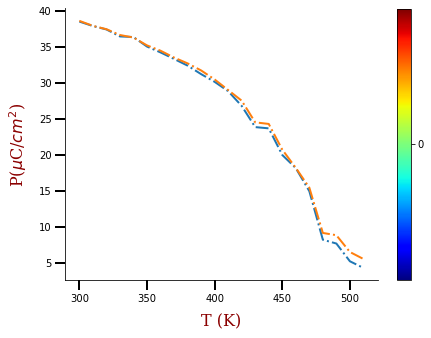

In [12]:
cb_step = 105
ef_step = 5

electric_fields = ["0","5"]
save_file = "Strain0_15_10000_PT"
peaks_for_temp = get_peaks(data,electric_fields,init_temp_value, ef_step, cb_step, fin_temp_value,temp_step,save_file)
peaks_for_temp.to_csv("My_MD_Temp_.csv", header=False, index=False)
#print(Strain0_15_10000_PT)

# Fitting P vs T

1373    -999.921044
1372    -999.684189
1371    -999.289473
1370    -998.736957
1369    -998.026728
           ...     
128      998.736957
127      999.289473
126      999.684189
125      999.921044
124     1000.000000
Name: Electric Field, Length: 750, dtype: float64

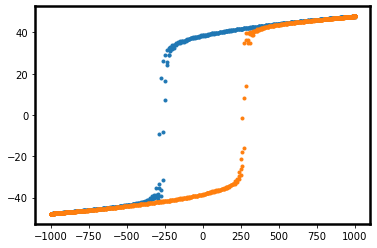

In [14]:
a = np.where(np.diff(data["300"]["Electric Field"]) < 0)
b = np.where(np.diff(data["300"]["Electric Field"]) > 0)
data["300"]["Electric Field"][a[0]]

plt.plot(data["300"]["Electric Field"][a[0]][::-1], data["300"]["Polarization"][a[0]][::-1], ".")
plt.plot(data["300"]["Electric Field"][b[0]], data["300"]["Polarization"][b[0]], ".")

data["300"]["Electric Field"][a[0]][::-1]

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


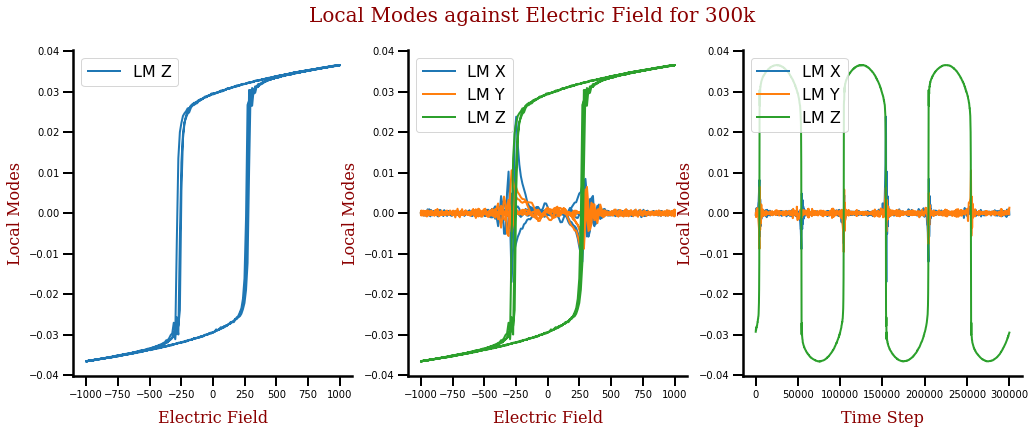

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


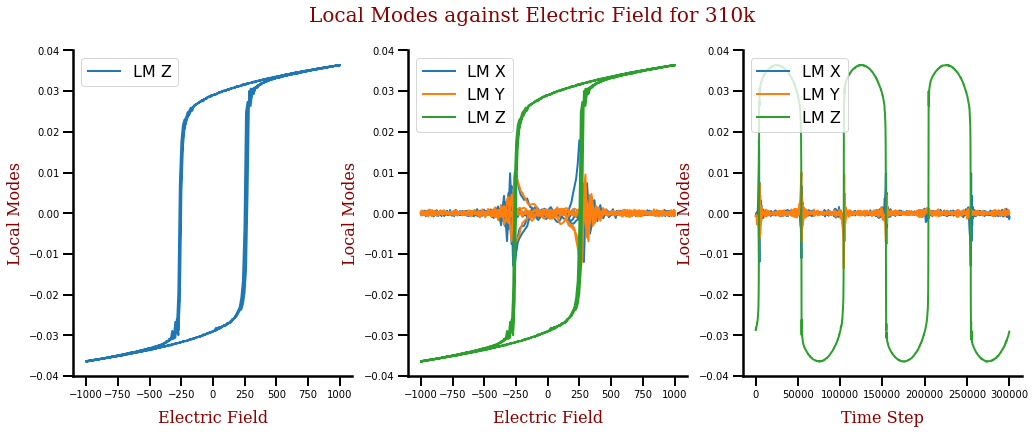

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


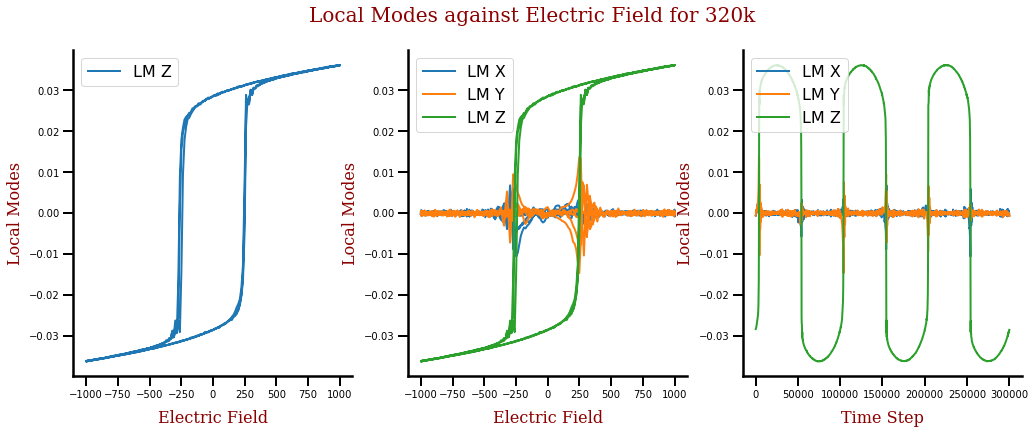

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


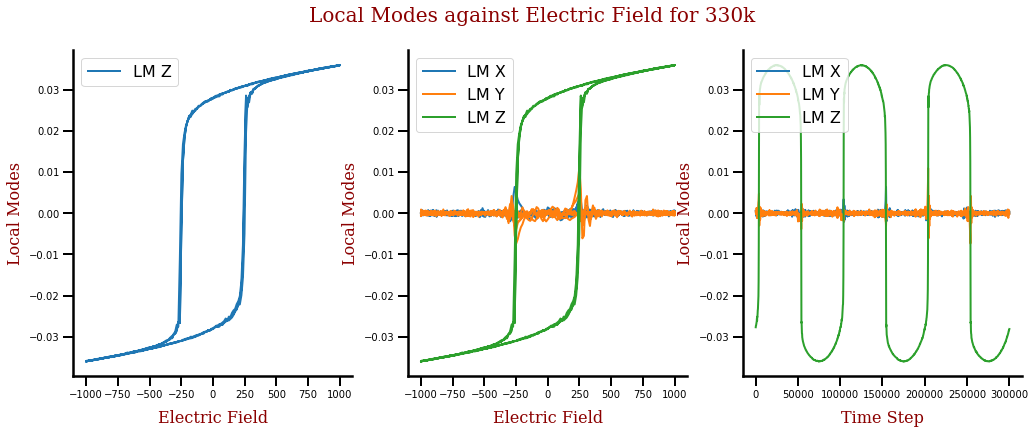

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


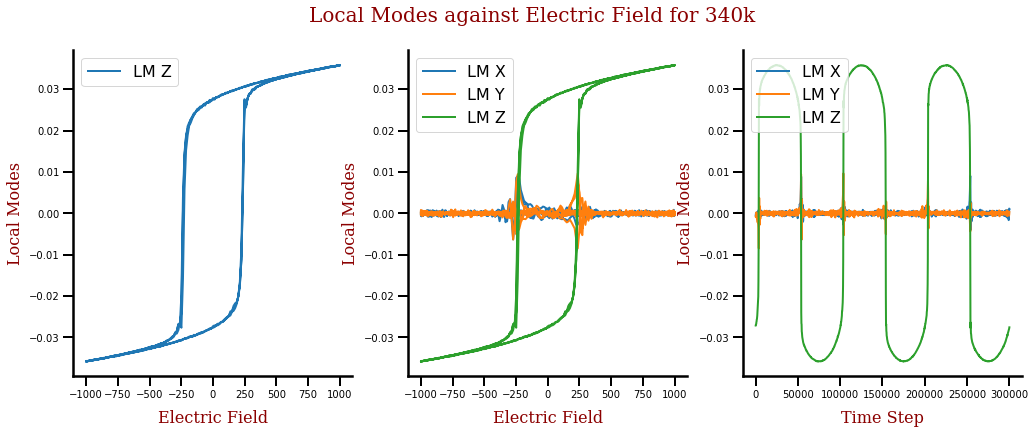

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


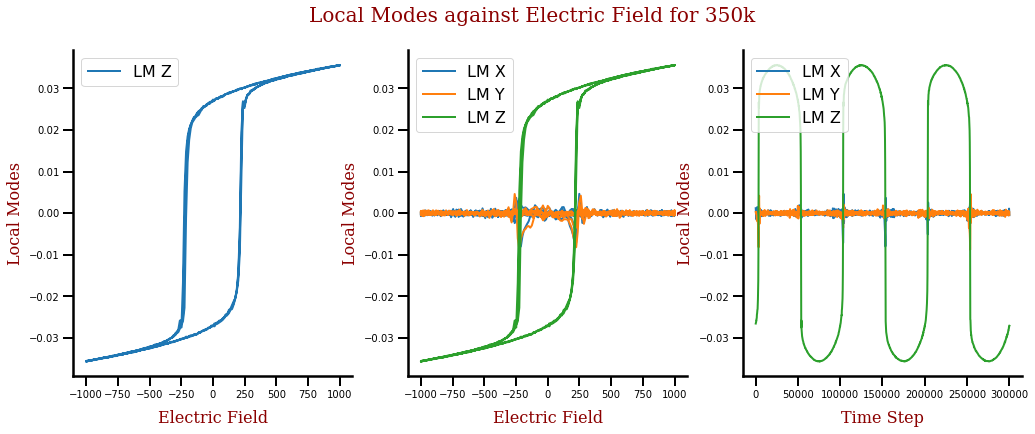

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


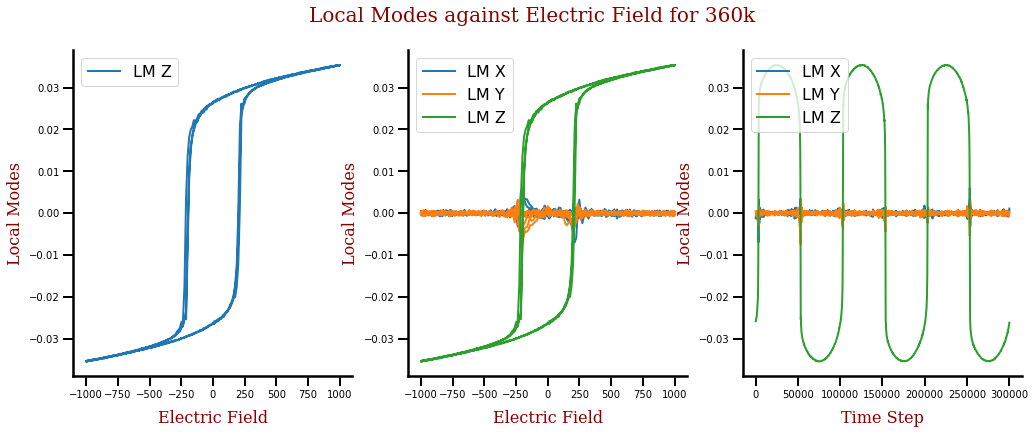

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


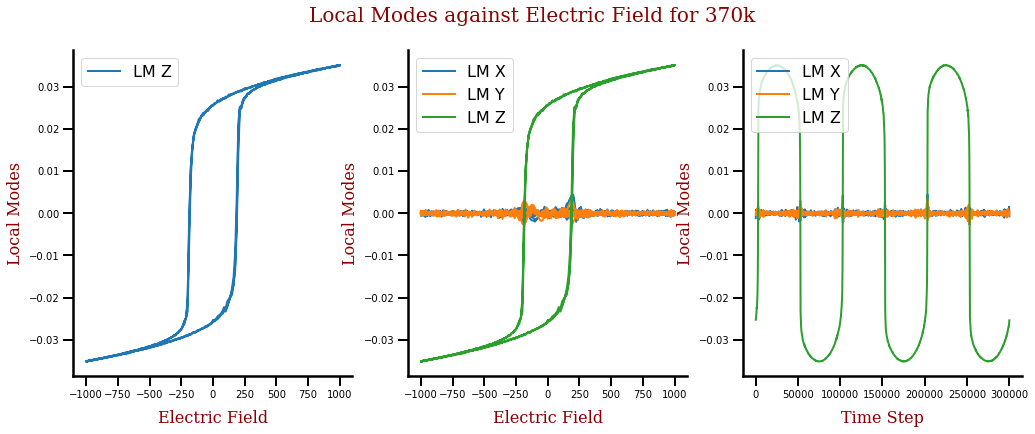

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


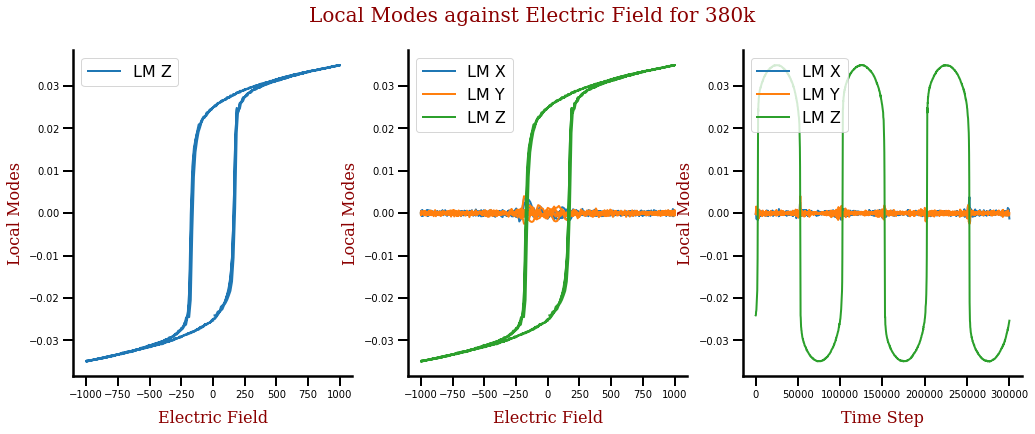

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


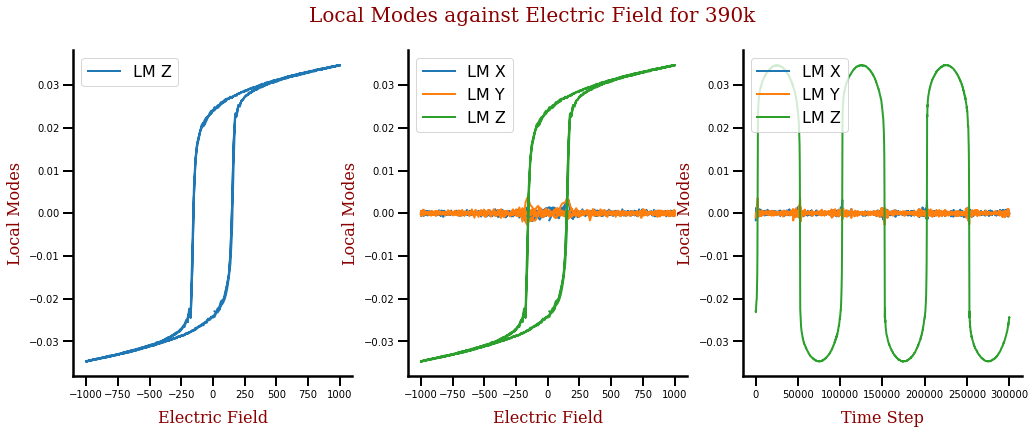

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


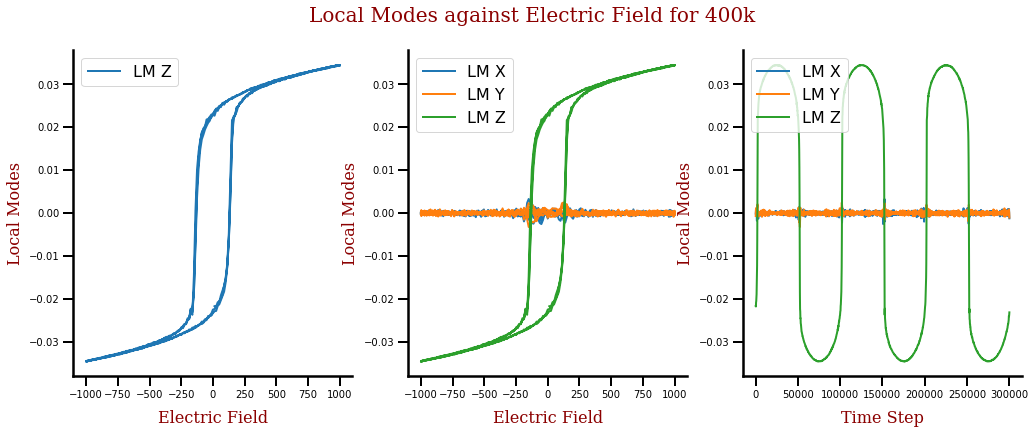

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


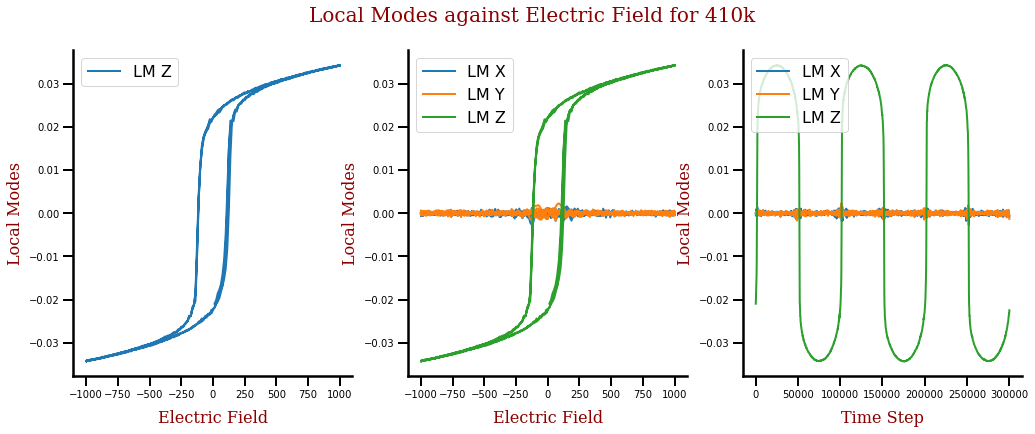

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


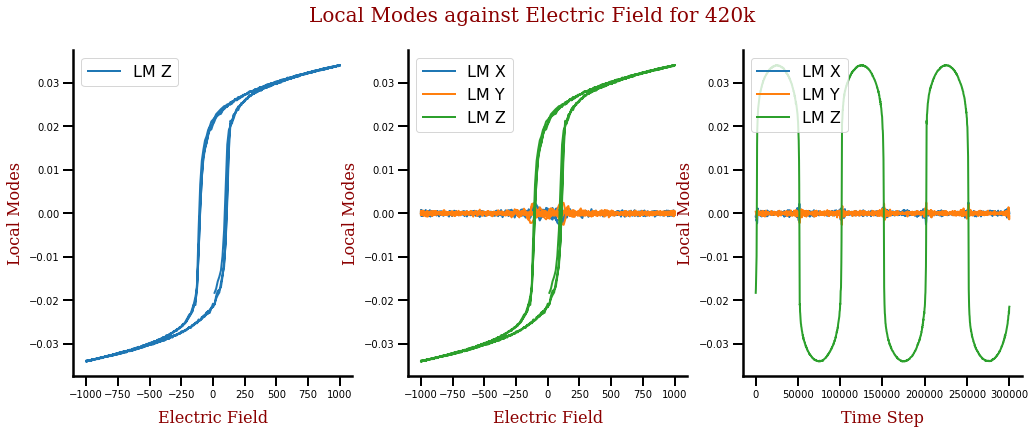

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


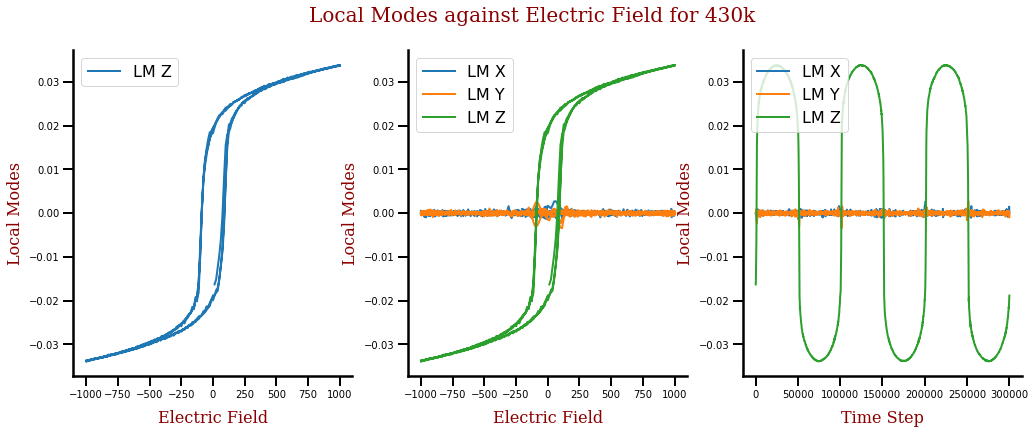

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


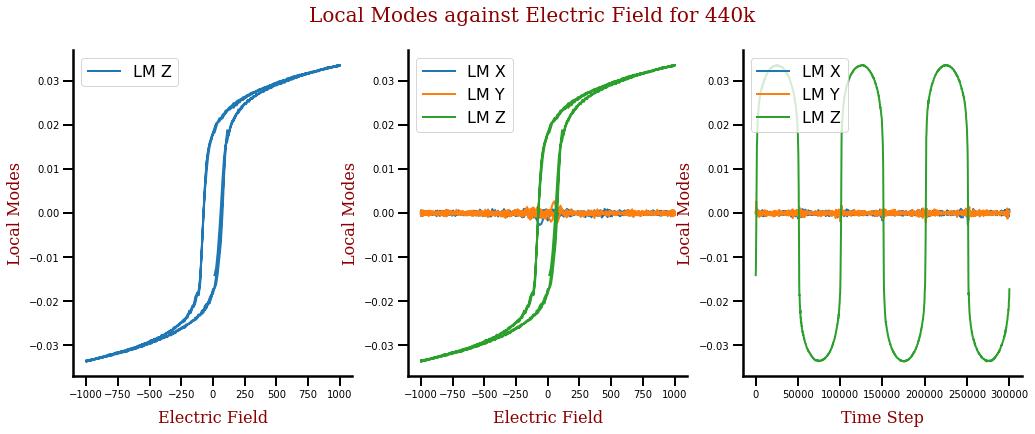

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


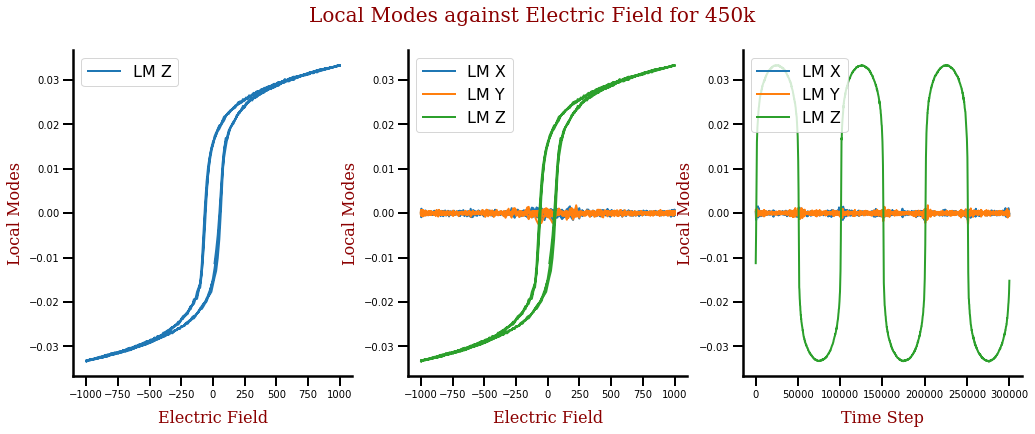

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


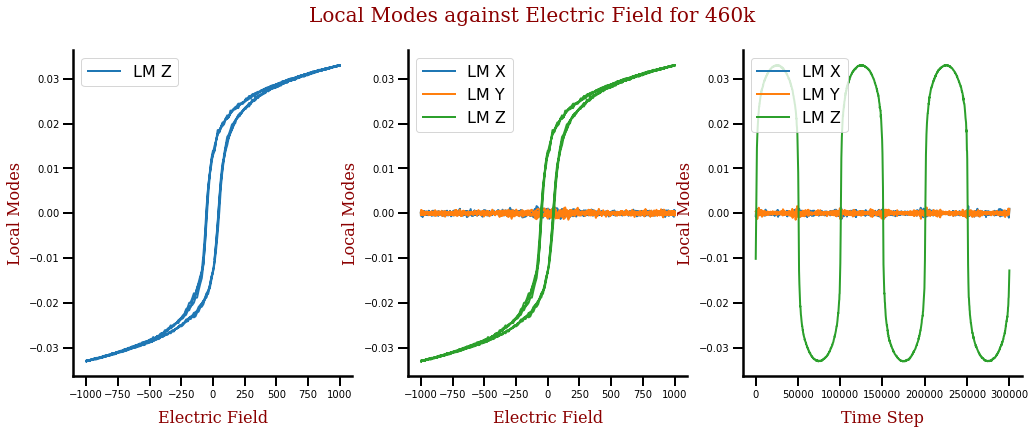

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


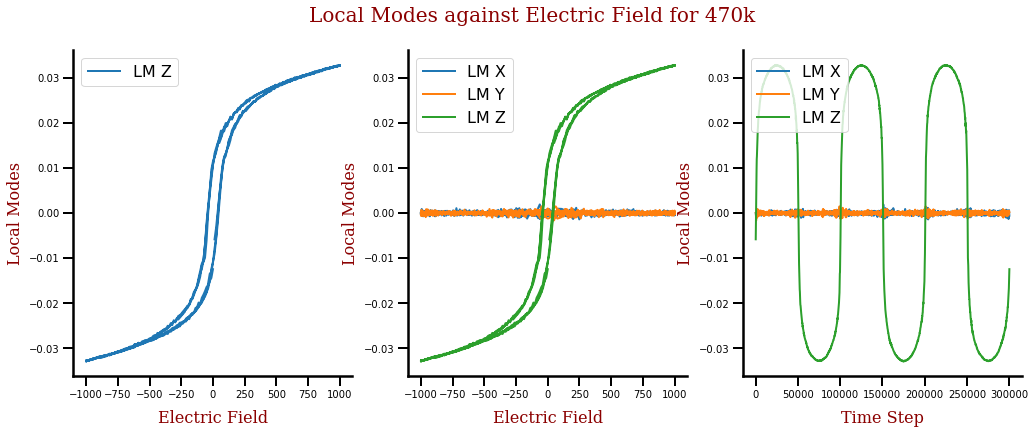

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


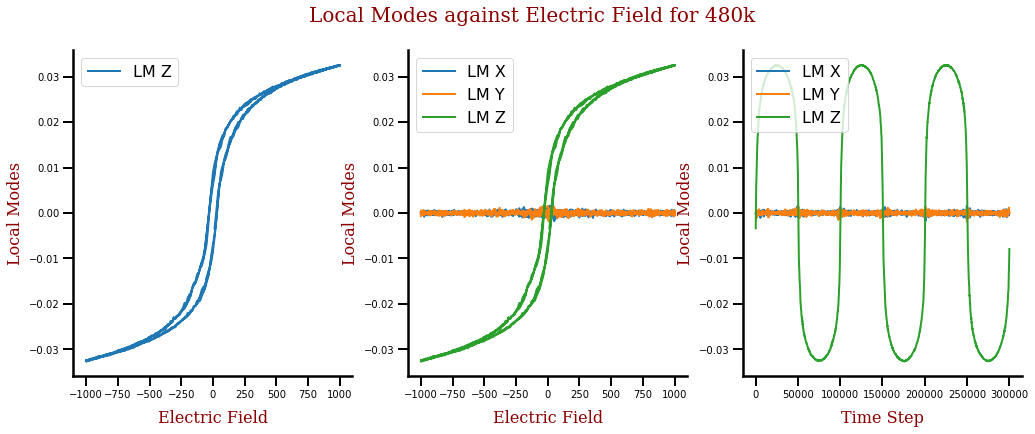

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


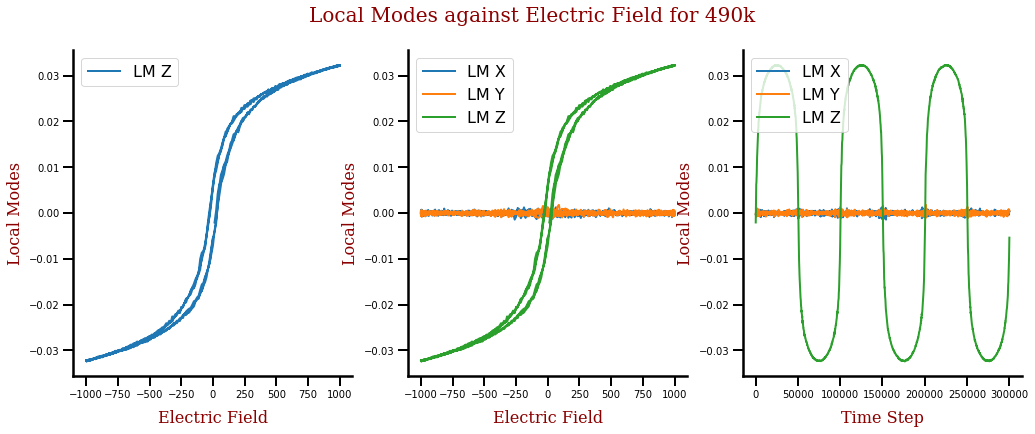

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


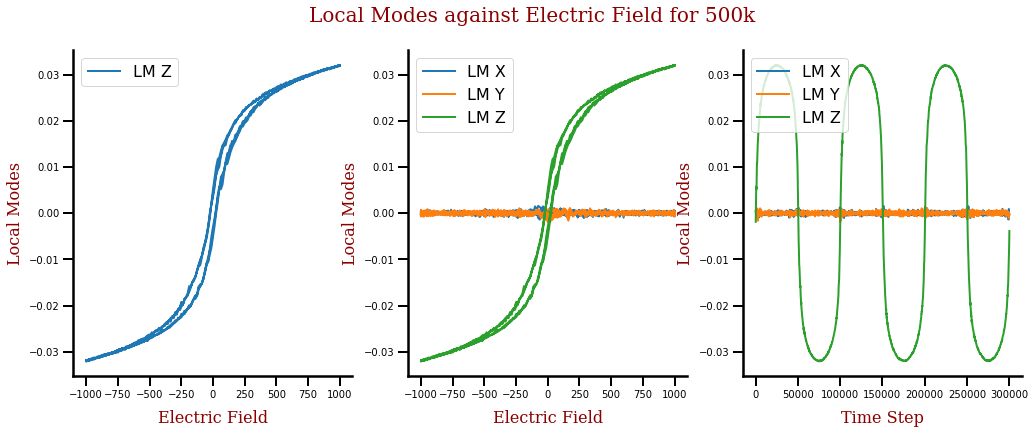

/var/folders/xb/tvm68bb93mng88h75fb6tk380000gn/T/ipykernel_16679/758997100.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)


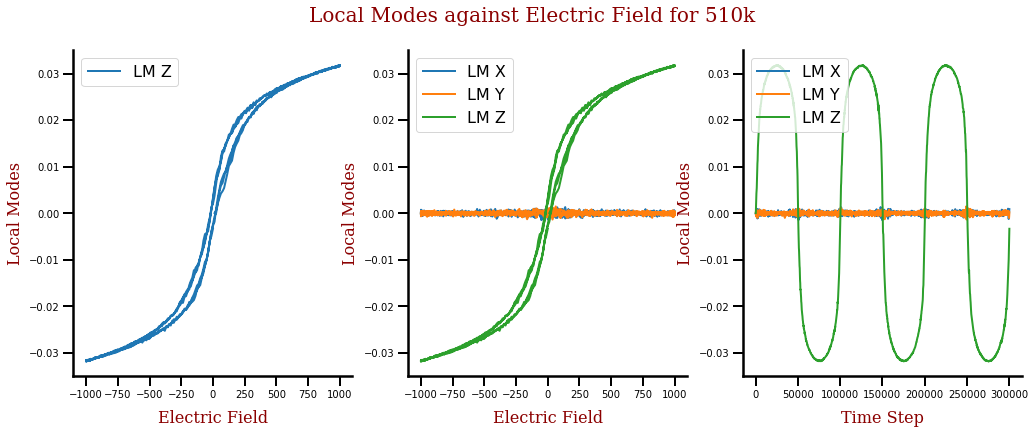

In [15]:
quantities_1 = {"X Values": "Electric Field", 
              "Y Values" : ["LM Z"], 
               "X label": "Electric Field",
               "Y label": "Local Modes",
               "Legend Location": "upper left"}

quantities_2 = {"X Values": "Electric Field", 
              "Y Values" : ["LM X", "LM Y", "LM Z"],
               "X label": "Electric Field",
               "Y label": "Local Modes",
               "Legend Location": "upper left"}

quantities_3 = {"X Values": "Time Step", 
              "Y Values" : ["LM X", "LM Y", "LM Z"], 
               "X label": "Time Step",
               "Y label": "Local Modes",
               "Legend Location": "upper left"}

quantities_4 = {"X Values": "Electric Field", 
              "Y Values" : ["Error X", "Error Y", "Error Z"], 
               "X label": "Electric Field",
               "Y label": "Errors",
               "Legend Location": "upper right"}

quantities = [quantities_1, quantities_2, quantities_3]
# filename you want to save figure as. Example should be something like Local_Modes_vs_Electric_Field_
save_filename = "LocalModes_vs_ElectricField" 

# Specify the title of your plot here for example "Local Modes against Electric Field for temperature"

plot_title = "Local Modes against Electric Field for" 
figure_size = (17, 6)

for k in range(init_temp_value, fin_temp_value + temp_step, temp_step):
    plot_data(quantities, data, save_filename, k, plot_title, figure_size)

## Concentration Data Processing

In [16]:
import numpy as np

In [17]:

def process_conc_data(filename, time_step, init_time_value, fin_time_value, init_temp_value, fin_temp_value, temp_step, column_names):
    
    data = {}  # This is a dictionary to contain data for each temperature


    number_of_rows = int(((fin_time_value - init_time_value)/time_step) + 1) 


    number_of_temperatures = int(((fin_temp_value - init_temp_value)/temp_step) + 1)

    
    for k in range(init_temp_value, fin_temp_value + temp_step, temp_step):

        # this code says, for example, if this is tempertare number 2, skip 2 X number_of_rows and the read only number_of_rows
        index_of_temperature = int(((k - init_temp_value)/temp_step) + 1)
        header_rows_to_skip = (index_of_temperature - 1) * (number_of_rows)

        data["{}".format(k)] = pd.read_csv("{}.txt".format(filename), header=None, delimiter=" ", skipinitialspace=True,
                                           names=column_names, skiprows=header_rows_to_skip,  nrows=number_of_rows)

    return data
        


In [29]:
column_names = ["Time Step", "LM X", "Error X", "LM Y", "Error Y", "LM Z", "Error Z"]


# init_temp_value = 150
# fin_temp_value = 450
# temp_step = 10

init_time_value = 200
fin_time_value = 300000
time_step = 200


concentration_init = 0.02
conc_step = 0.02
concentration_fin = 0.26
Concentration_Data = {}

print("Are the initial and final temperature values different for each concentration?")
answer = input()

if answer.lower() == "no":
    
    print("Enter the Initial, Final, and Temperature Steps in that order: Initial, then Final, then Step\n")
    print("Note, this must be the same for all concentrations")
    
    init_temp_value = int(input())
    fin_temp_value = int(input())
    temp_step = int(input())

    for k in np.arange(concentration_init, concentration_fin + conc_step, conc_step):
        filepath = "outdat/out_{0:.2f}".format(k)

        Concentration_Data["{0:.2f}".format(k)] = process_conc_data(filepath, time_step, init_time_value, fin_time_value,
                                                             init_temp_value, fin_temp_value, temp_step, column_names)
elif answer.lower() == "yes":
        
    for k in np.arange(concentration_init, concentration_fin + conc_step, conc_step):
        filepath = "outdat/out_{0:.2f}".format(k)

        print("Enter the Initial, Final and Temperature steps for Concentration {0:.2f} in that order:\
            Initial, then Final, then Step".format(k))
        init_temp_value = int(input())
        fin_temp_value = int(input())
        temp_step = int(input())

        Concentration_Data["{0:.2f}".format(k)] = process_conc_data(filepath, time_step, init_time_value, fin_time_value,
                                                             init_temp_value, fin_temp_value, temp_step, column_names)

Are the initial and final temperature values different for each concentration?
yes
Enter the Initial, Final and Temperature steps for Concentration 0.02 in that order:            Initial, then Final, then Step
320
510
10
Enter the Initial, Final and Temperature steps for Concentration 0.04 in that order:            Initial, then Final, then Step
320
510
10
Enter the Initial, Final and Temperature steps for Concentration 0.06 in that order:            Initial, then Final, then Step
320
510
10
Enter the Initial, Final and Temperature steps for Concentration 0.08 in that order:            Initial, then Final, then Step
320
510
10
Enter the Initial, Final and Temperature steps for Concentration 0.10 in that order:            Initial, then Final, then Step
320
510
10
Enter the Initial, Final and Temperature steps for Concentration 0.12 in that order:            Initial, then Final, then Step
320
510
10
Enter the Initial, Final and Temperature steps for Concentration 0.14 in that order:     

In [30]:
Concentration_Data["0.04"]["400"]

,Time Step,LM X,Error X,LM Y,Error Y,LM Z,Error Z
0,200,0.019064,0.000092,-0.019401,0.000048,0.018469,0.000085
1,400,0.019629,0.000154,-0.019544,0.000024,0.018848,0.000077
2,600,0.019677,0.000105,-0.019304,0.000112,0.018740,0.000100
3,800,0.019491,0.000010,-0.019147,0.000045,0.018564,0.000011
4,1000,0.019428,0.000057,-0.019610,0.000217,0.018672,0.000079
...,...,...,...,...,...,...,...
1495,299200,0.018857,0.000106,-0.019858,0.000027,0.018614,0.000021
1496,299400,0.019150,0.000078,-0.019727,0.000061,0.018513,0.000024
1497,299600,0.019327,0.000016,-0.019566,0.000024,0.018619,0.000077
1498,299800,0.019080,0.000118,-0.019376,0.000080,0.018814,0.000012


In [31]:
def plot_conc_data(Concentration_Data, save_filename, Concentration, plot_title, 
                   figure_size, init_temp_value, fin_temp_value, temp_step):

        
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figure_size)
    
        font = {'family': 'serif','color': 'darkred','weight': 'normal','size': 16}
        
        
        for value in quantities[0]["Y Values"]:
            
            mean_of_temp = []
            
            for k in range(init_temp_value, fin_temp_value + temp_step, temp_step):
                index_of_temperature = int(((k - init_temp_value)/temp_step))
                mean_of_temp.append(np.abs(Concentration_Data[Concentration]["{}".format(k)][value].mean()))
                
            ax.plot(np.arange(init_temp_value, fin_temp_value + temp_step, temp_step), 
                    mean_of_temp, "-.", linewidth=2, markersize=10, label=value)  
            
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', bottom=True)
        ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='out', left=True)
        ax.legend(loc=quantities[0]["Legend Location"], frameon=True, fontsize=16, bbox_to_anchor=(1.0, 0.5))
        ax.set_ylabel(quantities[0]["Y label"], fontdict=font, labelpad=10)
        ax.set_xlabel(quantities[0]["X label"], fontdict=font, labelpad=10)
        ax.set_title('Conc = {}'.format(Concentration), fontdict=font, pad=10)
                                              
        plt.savefig("{}_{}.png".format(save_filename, Concentration), dpi=300,
                                transparent=False, bbox_inches='tight')                                           
        plt.pause(5)
        plt.show(block=False)

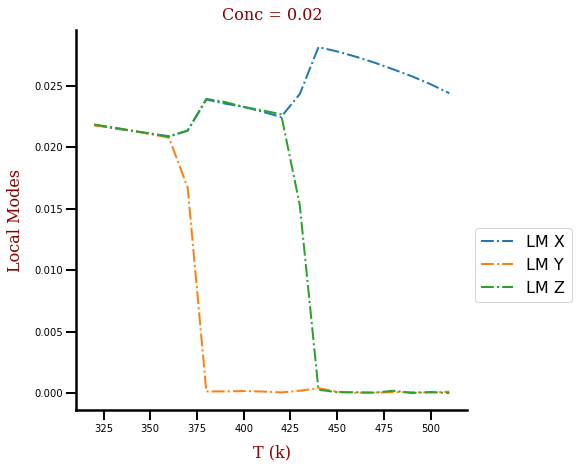

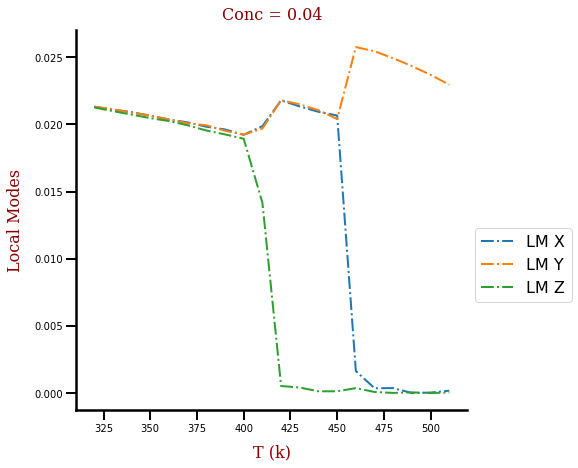

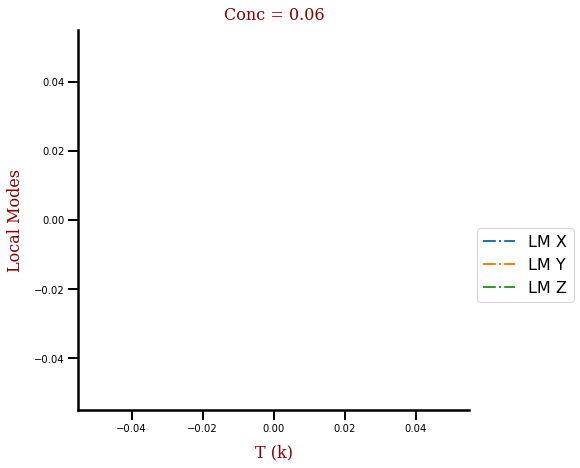

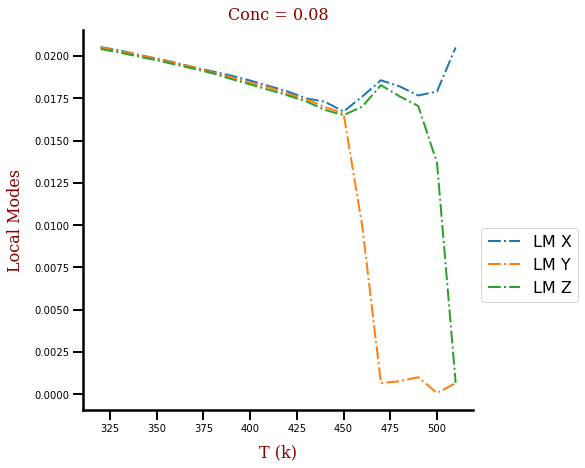

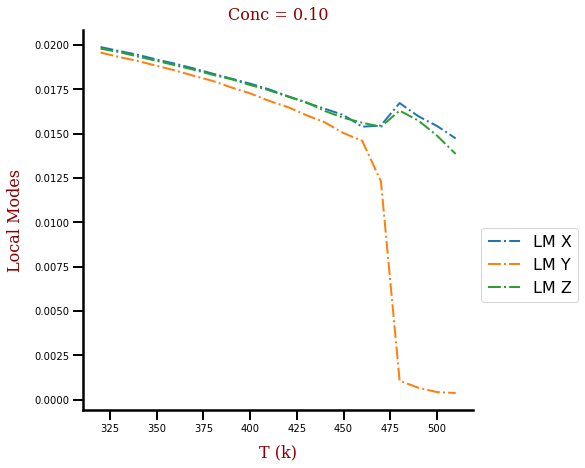

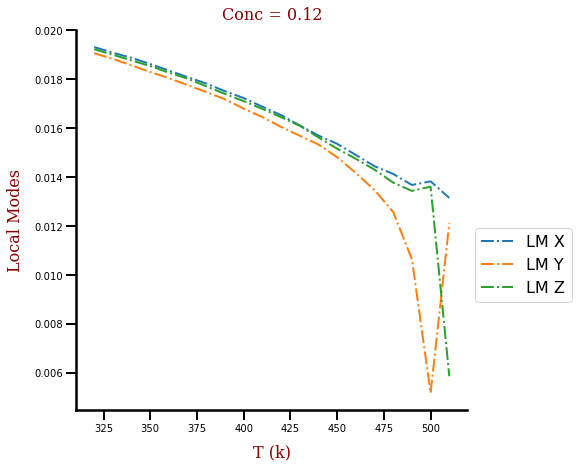

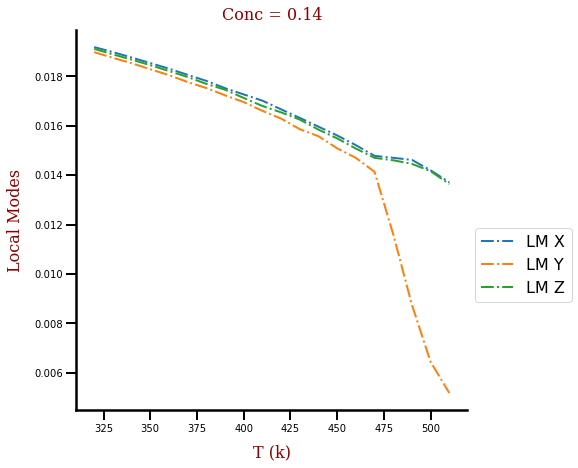

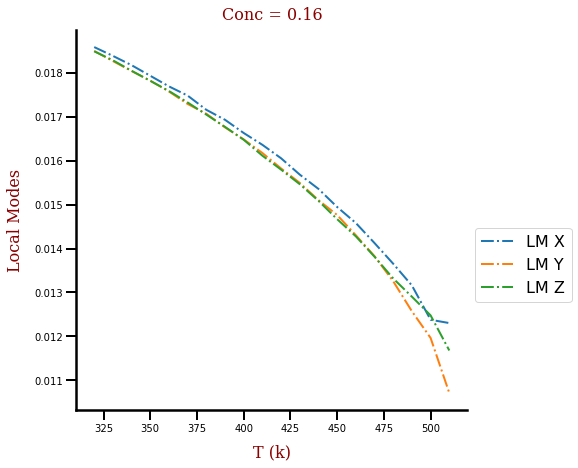

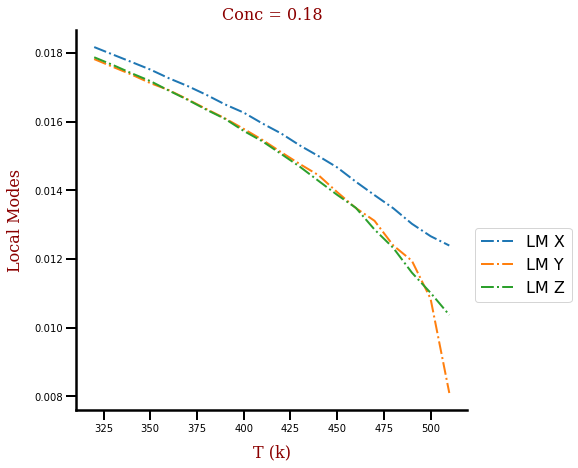

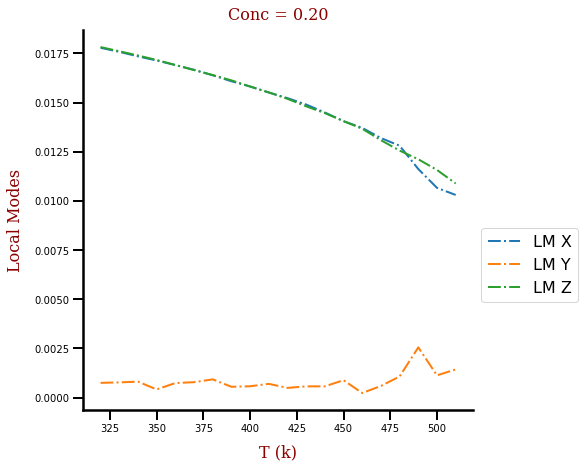

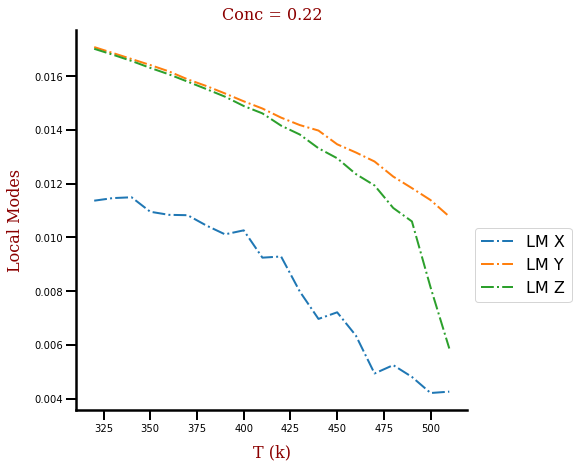

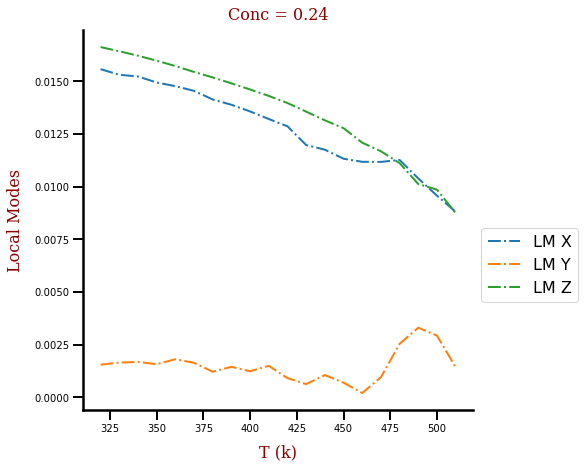

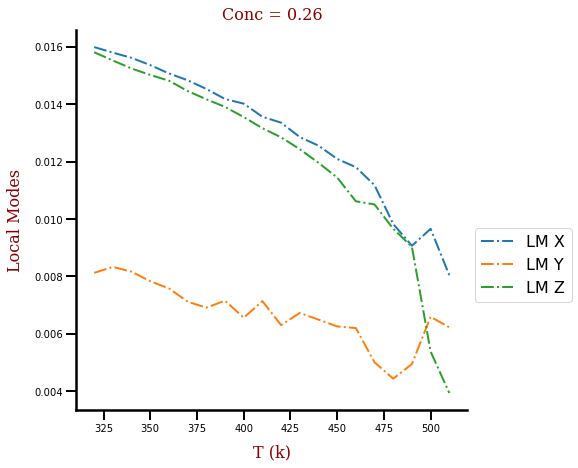

In [32]:
quantities_1 = {"X Values": "Temperature", 
              "Y Values" : ["LM X", "LM Y", "LM Z"], 
               "X label": "T (k)",
               "Y label": "Local Modes",
               "Legend Location": "upper left"}

quantities = [quantities_1]

#Concentrations = [0.02, 0.04, 0.06]
save_filename = "MeanLocalModes_vs_Temperature_Conc" 

# Specify the title of your plot here for example "Local Modes against Electric Field for temperature"

figure_size = (7, 7)

for k in np.arange(concentration_init, concentration_fin + conc_step, conc_step):
    
    Concentration = "{0:.2f}".format(k)

    plot_conc_data(Concentration_Data, save_filename, Concentration, plot_title,
                   figure_size, init_temp_value, fin_temp_value, temp_step)